In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Digital Nest/Linear Regression")
print (os.getcwd())

C:\Digital Nest\Linear Regression


In [2]:
HP = pd.read_csv('House Prices.csv')
print(HP.shape)
HP.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
HP.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
# create independent data file
selcolumns = list(['TotalBsmtSF','GrLivArea'])
HPX = pd.DataFrame(HP,columns=selcolumns)
print(HPX.head())
# define independent data file
HPY = pd.DataFrame(HP,columns=["SalePrice"])
print(HPY.head())

   TotalBsmtSF  GrLivArea
0          856       1710
1         1262       1262
2          920       1786
3          756       1717
4         1145       2198
   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


In [5]:
from sklearn.tree import DecisionTreeRegressor
DTC = DecisionTreeRegressor(max_depth=2)
DTC.fit(HPX,HPY)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [6]:
print(DTC.feature_importances_)

[0.34183096 0.65816904]


[Text(167.4, 181.2, 'node #0\nGrLivArea <= 1488.0\nmse = 6306788585.349\nsamples = 1460\nvalue = 180921.196'),
 Text(83.7, 108.72, 'node #1\nTotalBsmtSF <= 1151.0\nmse = 1408525823.772\nsamples = 767\nvalue = 137687.228'),
 Text(41.85, 36.23999999999998, 'node #2\nmse = 839220809.356\nsamples = 593\nvalue = 125972.496'),
 Text(125.55000000000001, 36.23999999999998, 'node #3\nmse = 1287087005.129\nsamples = 174\nvalue = 177611.575'),
 Text(251.10000000000002, 108.72, 'node #4\nTotalBsmtSF <= 1081.0\nmse = 7369649464.101\nsamples = 693\nvalue = 228771.778'),
 Text(209.25, 36.23999999999998, 'node #5\nmse = 2132880142.364\nsamples = 330\nvalue = 184947.291'),
 Text(292.95, 36.23999999999998, 'node #6\nmse = 8797101026.392\nsamples = 363\nvalue = 268612.22')]

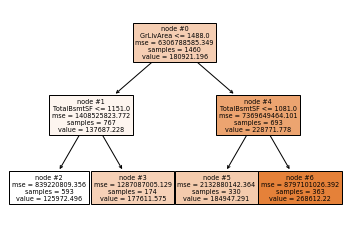

In [7]:
from sklearn import tree
tree.plot_tree(decision_tree = DTC,
               feature_names = HPX.columns.values,
               class_names = True,
               filled=True,
               node_ids=True,
               proportion=False)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


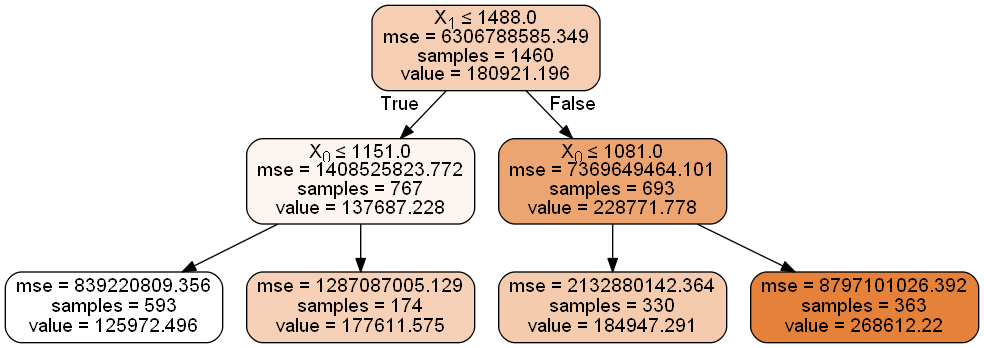

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())